In [ ]:
!pip install mlflow boto3 awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 96.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 54.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 705.9/705.9 kB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.1 MB/s eta 0:00:00


In [ ]:
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 kB 34.5 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9.1
    Uninstalling rsa-4.9.1:
      Successfully uninstalled rsa-4.9.1
  Attempting uninstall: docutils
    Found existing installation: docutils 0.21.2
    Uninstalling docutils-0.21.2:
      Successfully uninstalled docutils-0.21.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sphinx 8.2.3 requires docutils<0.22,>=0.20, but you have docutils 0.19 which is incompatible.


In [ ]:
import mlflow

mlflow.set_tracking_uri("http://ec2-3-101-102-207.us-west-1.compute.amazonaws.com:5000")
with mlflow.start_run():
    mlflow.log_param("param1", 15)
    mlflow.log_metric("metric1", 0.89)

🏃 View run legendary-bird-613 at: http://ec2-3-101-102-207.us-west-1.compute.amazonaws.com:5000/#/experiments/0/runs/670ca675df9446f486b5a04cfb1eb454
🧪 View experiment at: http://ec2-3-101-102-207.us-west-1.compute.amazonaws.com:5000/#/experiments/0


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
from scipy.spatial.distance import cdist
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, date

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/Personal Study/insurance/train.csv')

In [4]:
data = train.sample(n = 50000,random_state=42)
data.to_csv('data.csv')

In [ ]:
train.shape

(1200000, 21)

In [ ]:
train.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [ ]:
def age(born):
    born = str(born)
    born = datetime.strptime(born, "%Y-%m-%d %H:%M:%S.%f").date()
    today = date.today()
    return today.year - born.year - ((today.month,
                                      today.day) < (born.month,
                                                    born.day))


In [ ]:
train['Policy Age'] = train['Policy Start Date'].apply(age)

In [ ]:
train.isna().sum()

,0
id,0
Age,18705
Gender,0
Annual Income,44949
Marital Status,18529
Number of Dependents,109672
Education Level,0
Occupation,358075
Health Score,74076
Location,0


In [ ]:
train['Age'].fillna(train['Age'].mean(),inplace=True)
train['Annual Income'].fillna(train['Annual Income'].mean(),inplace=True)
train['Marital Status'].fillna('Single',inplace=True)
train['Number of Dependents'].fillna(0.0,inplace=True)
train['Occupation'].fillna('Unknown',inplace=True)
train['Health Score'].fillna(train['Health Score'].mean(),inplace=True)
train['Previous Claims'].fillna(0.0,inplace=True)
train['Credit Score'].fillna(train['Credit Score'].mean(),inplace=True)
train['Customer Feedback'].fillna('Average',inplace=True)
train.dropna(how='any',inplace = True)

In [ ]:
train.isna().sum()

,0
id,0
Age,0
Gender,0
Annual Income,0
Marital Status,0
Number of Dependents,0
Education Level,0
Occupation,0
Health Score,0
Location,0


In [ ]:
train.shape

(1199993, 22)

In [ ]:
data = train.sample(n = 50000,random_state=42)

In [ ]:
features = ['Gender', 'Marital Status', 'Number of Dependents', 'Education Level',
       'Occupation', 'Location', 'Policy Type', 'Previous Claims',
       'Vehicle Age', 'Insurance Duration', 'Customer Feedback',
       'Smoking Status', 'Exercise Frequency', 'Property Type', 'Policy Age',
       'Age', 'Annual Income', 'Health Score', 'Credit Score']

In [ ]:
X,y = data[features],data['Premium Amount']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40000, 19), (10000, 19), (40000,), (10000,))

In [ ]:
def sort_columns(colList,df):
    catColumn = []
    numColumn = []
    for col in colList:
        if df[col].dtype == 'O':
            catColumn.append(col)
        else:
            if df[col].nunique() > 10:
                numColumn.append(col)
            else:
                catColumn.append(col)
    return catColumn,numColumn

catColumn,numColumn = sort_columns(X_train.columns,X_train)

In [ ]:
catColumn,numColumn

(['Gender',
  'Marital Status',
  'Number of Dependents',
  'Education Level',
  'Occupation',
  'Location',
  'Policy Type',
  'Previous Claims',
  'Insurance Duration',
  'Customer Feedback',
  'Smoking Status',
  'Exercise Frequency',
  'Property Type',
  'Policy Age'],
 ['Vehicle Age', 'Age', 'Annual Income', 'Health Score', 'Credit Score'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

object_columns = catColumn
for col in object_columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [ ]:
for col in X_train.columns:
    X_train[col] = np.log1p(X_train[col])
    X_test[col] = np.log1p(X_test[col])

y_train = np.log1p(y_train)
y_test = np.log1p(y_test)

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
!aws configure

In [ ]:
mlflow.set_tracking_uri("http://ec2-3-101-102-207.us-west-1.compute.amazonaws.com:5000")

In [ ]:
mlflow.set_experiment("LightGBM_Baseline")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004084 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 19
[LightGBM] [Info] Start training from score 6.595215


2025/09/13 07:42:40 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/13 07:42:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LightGBM_Baseline_TrainTestSplit at: http://ec2-3-101-102-207.us-west-1.compute.amazonaws.com:5000/#/experiments/0/runs/58875daa57c04400986ff1b70eb77b22
🧪 View experiment at: http://ec2-3-101-102-207.us-west-1.compute.amazonaws.com:5000/#/experiments/0
MSE: 1.1185975682719493


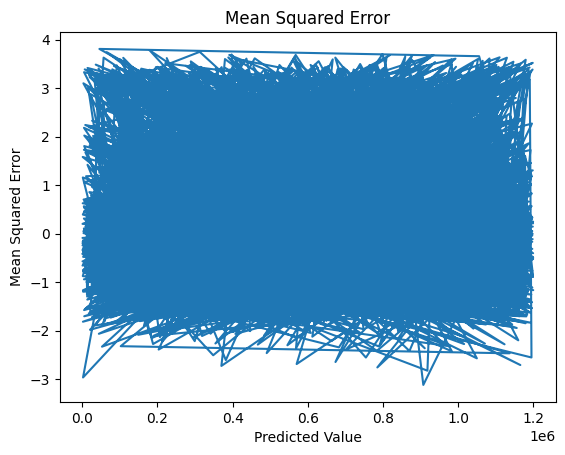

In [ ]:
with mlflow.start_run() as run:
    # Log a description for the run
    mlflow.set_tag("mlflow.runName", "LightGBM_Baseline_TrainTestSplit")
    mlflow.set_tag("experiment_type", "baseline")
    mlflow.set_tag("model_type", "LightGBM")

    # Add a description
    mlflow.set_tag("description", "Baseline LightGBM model for Premium Amount prediction with a simple train-test split")

    # Log parameters for the vectorizer
    mlflow.log_param("encoder_type", "LabelEncoder")
    mlflow.log_param("transformation", 'logp1_transformation')

    # Log Random Forest parameters
    # n_estimators = 200
    # max_depth = 15
    random_state = 42

    mlflow.log_param("random_state", random_state)
    # mlflow.log_param("n_estimators", n_estimators)
    # mlflow.log_param("max_depth", max_depth)

    # Initialize and train the model

    model = LGBMRegressor(random_state=random_state)
    model.fit(X_train,y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Log metrics for each class and accuracy
    mse = mean_squared_error(y_test, y_pred)
    mlflow.log_metric("mean squared error", mse)

    # classification_rep = classification_report(y_test, y_pred, output_dict=True)

    # for label, metrics in classification_rep.items():
    #     if isinstance(metrics, dict):  # For precision, recall, f1-score, etc.
    #         for metric, value in metrics.items():
    #             mlflow.log_metric(f"{label}_{metric}", value)


    errors = y_pred-y_test

    plt.plot(errors)
    plt.xlabel('Predicted Value')
    plt.ylabel('Mean Squared Error')
    plt.title("Mean Squared Error")
    plt.savefig("mean_squared_error.png")
    mlflow.log_artifact("/content/mean_squared_error.png")


    # Log the Random Forest model
    mlflow.sklearn.log_model(model, "lgbm_model")

    # Optionally log the dataset itself (if it's small enough)
    data.to_csv("dataset.csv", index=False)
    mlflow.log_artifact("/content/dataset.csv")

# Display final mse
print(f"MSE: {mse}")

In [ ]:
%%time
from lightgbm import LGBMRegressor
model = LGBMRegressor(random_state=42,
                     )
model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 888
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 19
[LightGBM] [Info] Start training from score 6.595215
CPU times: user 840 ms, sys: 6.69 ms, total: 847 ms
Wall time: 223 ms


LGBMRegressor(random_state=42)

In [ ]:
y_pred = np.expm1(model.predict(X_test))

In [ ]:
y_pred[:10]

array([909.70178306, 773.86236553, 699.00872586, 805.75354312,
       782.58037679, 783.84799946, 778.32252872, 769.68662678,
       759.93508445, 808.16690121])

In [ ]:
np.expm1(y_test[:10])

,Premium Amount
1031575,716.0
709144,1389.0
137464,539.0
312057,1639.0
563517,679.0
934460,829.0
865604,1414.0
952524,1862.0
768315,2273.0
859071,3607.0


In [ ]:
y_pred[:10]-np.expm1(y_test[:10])

,Premium Amount
1031575,193.701783
709144,-615.137634
137464,160.008726
312057,-833.246457
563517,103.580377
934460,-45.152001
865604,-635.677471
952524,-1092.313373
768315,-1513.064916
859071,-2798.833099
